In [436]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [454]:
a = 1
b = 5
c = -4
d = 5

beginning_points = [(0, 0), (30, 60), (90, 135)]
t_values = [0.01, 0.05, 0.1]
epsi_values = [0.01, 0.1, 0.3]
table = []
comb_num = 1

In [455]:
#f(x1, x2) = x1 − ax2 + bx1^2 + cx1x2 + dx2^2

#mana f( ) = x1 - x2 + 5x1^2 - 4x1x2 + 5x2^2
#lai sasinatu kodu pats aprekinajumu atvasinajumu pec x1 un x2
#Atv. pec x1  = 10x1 - 4x2 + 1
#Atv. pec x2  = -4x1 + 10x2 -1

#Minimizaccijas vertibas iegutas ar wolfram = (-1/14;1/14)

In [456]:
for x1, x2 in beginning_points:
    for t in t_values:
        for epsi in epsi_values:
            
            iter_counter = 0
            gradient = [10*x1 - 4*x2 + 1, -4*x1 + 10*x2 -1]
            x1_new = x1
            x2_new = x2
            
            while abs(gradient[0]) >= epsi and abs(gradient[1]) >= epsi:
                x1_new = x1_new - t * gradient[0]
                x2_new = x2_new - t * gradient[1]

                gradient[0] = 10*x1_new - 4*x2_new + 1
                gradient[1] = -4*x1_new + 10*x2_new -1

                iter_counter += 1

                if iter_counter == 10000:
                    print(combination_num, " combination reached iterations limit")
                    break

            x1_diff = round((-1 / 14) - x1_new, 4)
            x2_diff = round((1 / 14) - x2_new, 4)
            table.append([comb_num, x1, x2, round(x1_new,4), round(x2_new,4),t, epsi, iter_counter, x1_diff, x2_diff])
            comb_num += 1

In [457]:
csv_file = "result_table.csv"
with open(csv_file, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(
        ["Combination", "x1", "x2", "x1_final","x2_final", "t", "epsi", "iter", "x1 difference", "x2 difference"]
    )
    writer.writerows(table)

In [458]:
df = pd.read_csv(csv_file)
pd.set_option('display.max_rows', None)

In [459]:
print(df) 

    Combination  x1   x2  x1_final  x2_final     t  epsi  iter  x1 difference  \
0             1   0    0   -0.0708    0.0708  0.01  0.01    31        -0.0007   
1             2   0    0   -0.0650    0.0650  0.01  0.10    16        -0.0064   
2             3   0    0   -0.0501    0.0501  0.01  0.30     8        -0.0214   
3             4   0    0   -0.0708    0.0708  0.05  0.01     4        -0.0006   
4             5   0    0   -0.0650    0.0650  0.05  0.10     2        -0.0064   
5             6   0    0   -0.0650    0.0650  0.05  0.30     2        -0.0064   
6             7   0    0   -0.0711    0.0711  0.10  0.01     6        -0.0003   
7             8   0    0   -0.0760    0.0760  0.10  0.10     3         0.0046   
8             9   0    0   -0.0600    0.0600  0.10  0.30     2        -0.0114   
9            10  30   60   -0.0698    0.0731  0.01  0.01   165        -0.0017   
10           11  30   60   -0.0551    0.0878  0.01  0.10   128        -0.0164   
11           12  30   60   -

In [460]:
df.head()

,Combination,x1,x2,x1_final,x2_final,t,epsi,iter,x1 difference,x2 difference
0,1,0,0,-0.0708,0.0708,0.01,0.01,31,-0.0007,0.0007
1,2,0,0,-0.0650,0.0650,0.01,0.10,16,-0.0064,0.0064
2,3,0,0,-0.0501,0.0501,0.01,0.30,8,-0.0214,0.0214
3,4,0,0,-0.0708,0.0708,0.05,0.01,4,-0.0006,0.0006
4,5,0,0,-0.0650,0.0650,0.05,0.10,2,-0.0064,0.0064


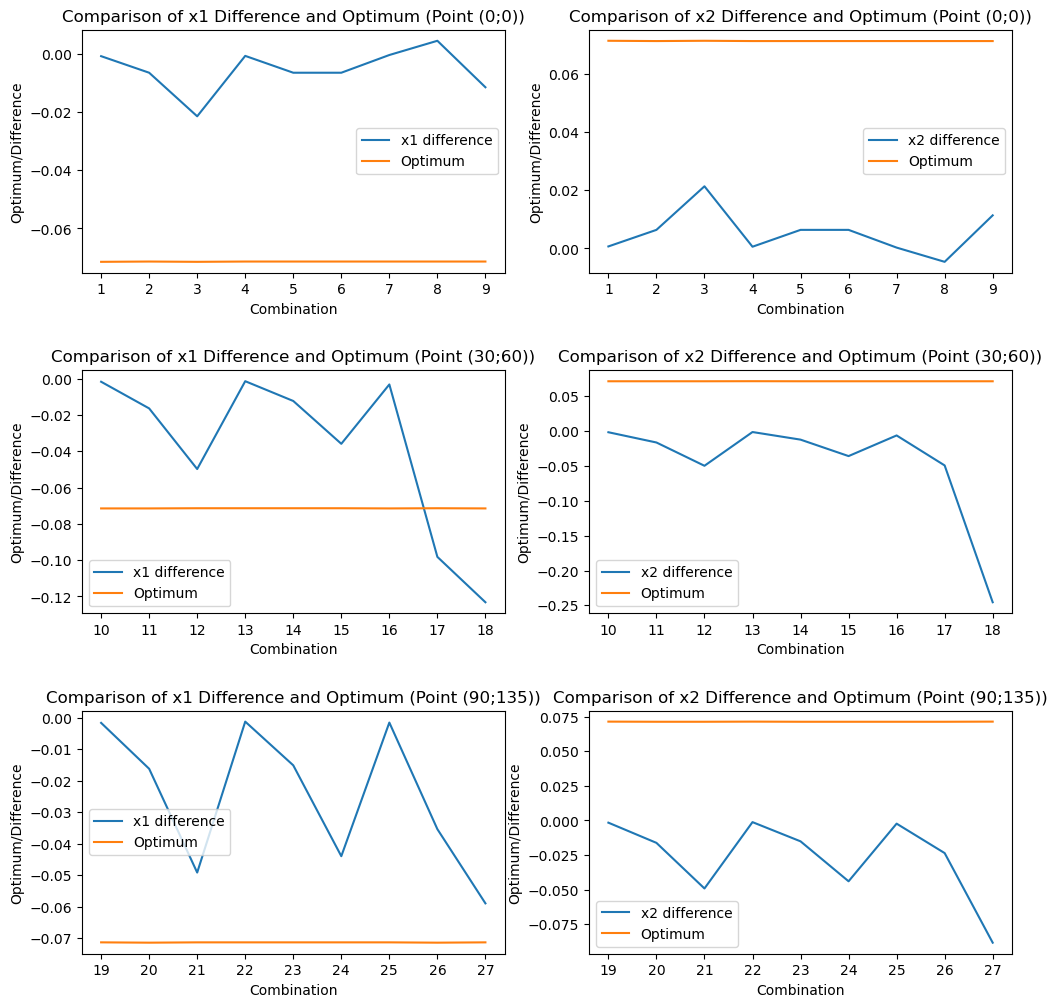

In [461]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
plt.subplots_adjust(hspace=0.4)
titles = ['Point (0;0)', 'Point (30;60)',  'Point (90;135)']


#x1
for i, ax in enumerate(axes[:, 0]):
    section = combinations[i * 9 : (i + 1) * 9]
    x1_diff = x1_difference[i * 9 : (i + 1) * 9]
    x1_optimum = x1_final[i * 9 : (i + 1) * 9] + x1_diff

    ax.plot(section, x1_diff, label='x1 difference')
    ax.plot(section, x1_optimum, label='Optimum')

    ax.set_xlabel('Combination')
    ax.set_ylabel('Optimum/Difference')
    ax.set_title(f'Comparison of x1 Difference and Optimum ({titles[i]})')
    ax.legend()

    
#x2
for i, ax in enumerate(axes[:, 1]):
    section = combinations[i * 9 : (i + 1) * 9]
    x2_diff = x2_difference[i * 9 : (i + 1) * 9]
    x2_optimum = x2_final[i * 9 : (i + 1) * 9] + x2_diff

    ax.plot(section, x2_diff, label='x2 difference')
    ax.plot(section, x2_optimum, label='Optimum')

    ax.set_xlabel('Combination')
    ax.set_ylabel('Optimum/Difference')
    ax.set_title(f'Comparison of x2 Difference and Optimum ({titles[i]})')
    ax.legend()

plt.show()

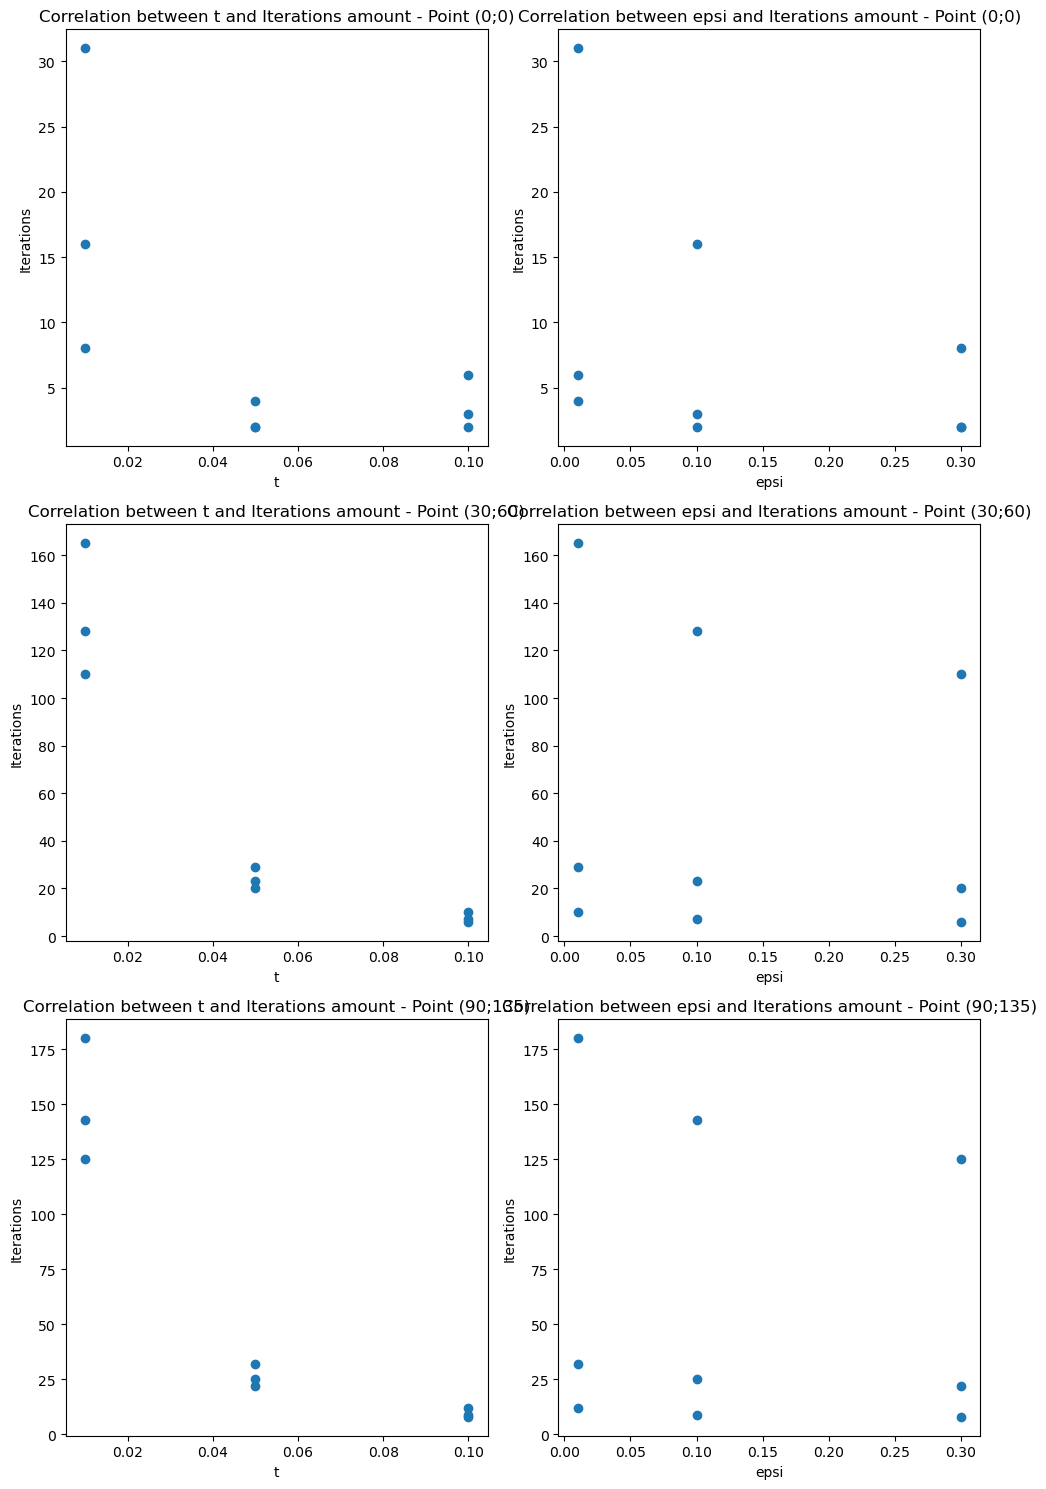

In [462]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
sections = [section1, section2, section3]
titles = ['Point (0;0)', 'Point (30;60)', 'Point (90;135)']

for i, section in enumerate(sections):
    row = i
    col = 0

    axs[row, col].scatter(section['t'], section['iter'])
    axs[row, col].set_xlabel('t')
    axs[row, col].set_ylabel('Iterations')
    axs[row, col].set_title(f'Correlation between t and Iterations amount - {titles[i]}')

    axs[row, col+1].scatter(section['epsi'], section['iter'])
    axs[row, col+1].set_xlabel('epsi')
    axs[row, col+1].set_ylabel('Iterations')
    axs[row, col+1].set_title(f'Correlation between epsi and Iterations amount - {titles[i]}')

plt.tight_layout()
plt.show()